<a href="https://colab.research.google.com/github/shubhanshurao/Tensor_Flow/blob/main/02_neural_network_calssification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import random
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from sklearn.datasets import make_circles

# make 1000 examples
n_samples = 1000

# Create Circles
X, Y = make_circles(n_samples, noise = 0.03, random_state = 42)

In [ ]:
# lets check out the features
X, X.shape

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]), (1000, 2))

In [ ]:
Y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [ ]:
X.shape, Y.shape

((1000, 2), (1000,))

In [ ]:
X[5]

array([-0.47964637,  0.67643477])

In [ ]:
circles = pd.DataFrame({"X0": X[:, 0], "X1" : X[:,1], "label": Y[:]}) # X0 is the name of the column and X[:] means all the item in X and X[:, 0] means all the item in X along the 0th AXIS
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


'carray-like or list of colors or color, optional\nThe marker colors. Possible values:\n\nA scalar or sequence of n numbers to be mapped to colors using cmap and norm.'

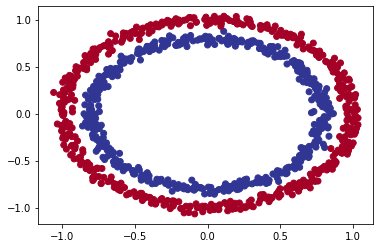

In [ ]:
plt.scatter(X[:,0], X[:,1] , c = Y, cmap = plt.cm.RdYlBu);
'''carray-like or list of colors or color, optional
The marker colors. Possible values:

A scalar or sequence of n numbers to be mapped to colors using cmap and norm.'''

In [ ]:
len(X), len(Y)

(1000, 1000)

# Steps in modelling in tensorflow
1. create or import model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
  # Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons

  # With TensorFlow 2.7.0
  # tf.keras.layers.Dense(100, input_shape=(None, 1)), # add 100 dense neurons

  ## After TensorFlow 2.8.0 ##
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
model_3.fit(X, Y, epochs=100, verbose=1) # fit for 100 passes of the data

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 3.3801 - accuracy: 0.4600
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7782 - accuracy: 0.4790
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7073 - accuracy: 0.4300
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6973 - accuracy: 0.4870
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6946 - accuracy: 0.4620
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6941 - accuracy: 0.4860
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.5050
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.4800
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4390
Epoch 11/

In [ ]:
model_3.evaluate(X,Y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6995 - accuracy: 0.5050


[0.6995376944541931, 0.5049999952316284]

In [ ]:
# making changes doesnt affect the accuracy of our model thus we need to find other ways

Still!

We've pulled out a few tricks but our model isn't even doing better than guessing.

Let's make some visualizations to see what's happening.

> 🔑 **Note:** Whenever your model is performing strangely or there's something going on with your data you're not quite sure of, remember these three words: **visualize, visualize, visualize**. Inspect your data, inspect your model, inpsect your model's predictions.

*******
To visualize our model's predictions we're going to create a function `plot_decision_boundary()` which:
* Takes in a trained model, features (`X`) and labels (`y`).
* Creates a [meshgrid](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html) of the different `X` values.
* Makes predictions across the meshgrid.
* Plots the predictions as well as a line between the different zones (where each unique class falls).
********

If this sounds confusing, let's see it in code and then see the output.

> 🔑 **Note:** If you're ever unsure of what a function does, try unraveling it and writing it line by line for yourself to see what it does. Break it into small parts and see what each part outputs.

In [ ]:
# def plot_decision_boundary(model, X, y):

#     # Set min and max values and give it some padding
#     x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
#     y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
#     h = 0.01

#     # Generate a grid of points with distance h between them
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

#     # Predict the function value for the whole grid
#     Z = model(np.c_[xx.ravel(), yy.ravel()])
#     Z = Z.reshape(xx.shape)

#     # Plot the contour and training examples
#     plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
#     plt.ylabel('x2')
#     plt.xlabel('x1')
#     plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)


In [ ]:
def plot_decision_boundary(model , X, Y):
  '''
  plots a decision boundary created by a model predicting on X
  '''
  # Define the axis boundaries of the plot and create a meshgrid

  '''In python, meshgrid is a function that creates a rectangular grid out of 2 given 1-dimensional arrays that denotes the Matrix or Cartesian indexing.'''

  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1 # here +- 0.1 is for margin nothing else
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100)) # the number of samples to generated

  '''numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
    Return evenly spaced numbers over a specified interval
    num int, optional
    Number of samples to generate. Default is 50. Must be non-negative.'''


  # Creating the X values (we will be making predictions on these values)

  x_in = np.c_[xx.ravel(), yy.ravel()] # .c_ it stacks the array together
  '''
  x = np.array([[1, 2, 3], [4, 5, 6]])
  np.ravel(x)
  array([1, 2, 3, 4, 5, 6])
  '''

  # make prediction

  y_pred = model.predict(x_in)

  #check for multiclass
  if( len(y_pred[0]) > 1):
    print("doing multiclass classification")
  # we have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)

  else:
    print("doing binary")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7) # alpha tells about opacacity 1 is complete opaque
  plt.scatter(X[:, 0], X[:, 1], c = Y, s = 40, cmap=plt.cm.RdYlBu) # s determines how big the size of scatter plot points come out
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())



# def plot_decision_boundary(model, X, y):
#   """
#   Plots the decision boundary created by a model predicting on X.
#   This function was inspired by two resources:
#    1. https://cs231n.github.io/neural-networks-case-study/
#    2. https://github.com/madewithml/basics/blob/master/notebooks/09_Multilayer_Perceptrons/09_TF_Multilayer_Perceptrons.ipynb
#   """
#   # Define the axis boundaries of the plot and create a meshgrid
#   x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
#   y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
#   xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
#                        np.linspace(y_min, y_max, 100))

#   # Create X value (we're going to make predictions on these)
#   x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

#   # Make predictions
#   y_pred = model.predict(x_in)

#   # Check for multi-class
#   if len(y_pred[0]) > 1:
#     print("doing multiclass classification")
#     # We have to reshape our prediction to get them ready for plotting
#     y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
#   else:
#     print("doing binary classification")
#     y_pred = np.round(y_pred).reshape(xx.shape)

#   # Plot the decision boundary
#   plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
#   plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
#   plt.xlim(xx.min(), xx.max())
#   plt.ylim(yy.min(), yy.max())

In [ ]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1 # here +- 0.1 is for margin nothing else
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
x_min, x_max


(-1.1595024599098636, 1.1337117525463374)

In [ ]:
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 5),
                       np.linspace(y_min, y_max, 2)) # the number of numbrs generated
xx, xx.shape

(array([[-1.15950246, -0.58619891, -0.01289535,  0.5604082 ,  1.13371175],
        [-1.15950246, -0.58619891, -0.01289535,  0.5604082 ,  1.13371175]]),
 (2, 5))

In [ ]:
yy, yy.shape

(array([[-1.16776832, -1.16776832, -1.16776832, -1.16776832, -1.16776832],
        [ 1.13600368,  1.13600368,  1.13600368,  1.13600368,  1.13600368]]),
 (2, 5))

In [ ]:
xx, yy = np.meshgrid(np.linspace(1, 2, 3),
                       np.linspace(1, 2, 3)) # the number of numbrs generated
np.linspace(1, 2, 3),  np.linspace(1, 2, 3)

(array([1. , 1.5, 2. ]), array([1. , 1.5, 2. ]))

In [ ]:
xx, yy

(array([[1. , 1.5, 2. ],
        [1. , 1.5, 2. ],
        [1. , 1.5, 2. ]]), array([[1. , 1. , 1. ],
        [1.5, 1.5, 1.5],
        [2. , 2. , 2. ]]))

313/313 [==============================] - 1s 1ms/step
doing binary


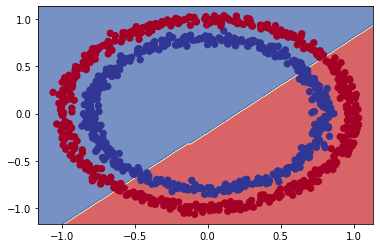

In [ ]:
plot_decision_boundary(model_3, X = X, Y = Y)

The decision boundary looks like to come to be an linear line.....
look like we have to introduce non linearity to our model

* what if we try to evaluate the model_3 on a linear data

it will give an error as the model_3 has a binarycrossentropy loss

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
# Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

# After TensorFlow 2.7.0, see here for more: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/278
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100


ValueError: ignored

If using tf.keras.losses.BinaryCrossEntropy() (classification) and your input data is one dimensional ([0, 1, 2, 3, 4, 5...]), you need to specify the input_shape to the model.


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
# Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

# After TensorFlow 2.7.0
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

If you're using tf.keras.losses.mae and your data is one dimensional ([1, 2, 3, 4, 5...]) you only have to expand the dimensions of the input data.

In [ ]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train,
            epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 5ms/step - loss: 356.8499 - mae: 356.8499
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 224.6973 - mae: 224.6973
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 97.3469 - mae: 97.3469
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 60.3524 - mae: 60.3524
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 81.2248 - mae: 81.2248
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 57.1345 - mae: 57.1345
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 44.6942 - mae: 44.6942
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 44.8196 - mae: 44.8196
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 43.6870 - mae: 43.6870
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 42.9317 - mae: 42.9317
Epoch 11/100
5/5 [==============================] - 0s 

2/2 [==============================] - 0s 10ms/step


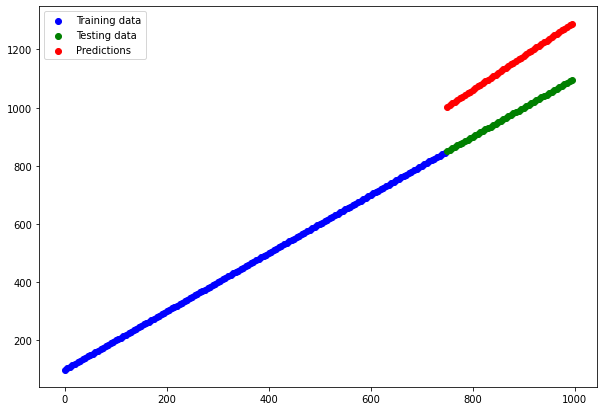

In [ ]:
# Make predictions with our trained model
y_reg_preds = model_3.predict(y_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();

# The missing piece: Non-Linearity

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_4.fit(X, Y, epochs=100)


Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 5.7735 - accuracy: 0.4810
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7419 - accuracy: 0.4820
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7160 - accuracy: 0.4840
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7257 - accuracy: 0.4840
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7122 - accuracy: 0.4840
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7051 - accuracy: 0.4830
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7028 - accuracy: 0.4830
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7020 - accuracy: 0.4830
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7014 - accuracy: 0.4830
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7008 - accuracy: 0.4830
Epoch 11/

loss: 3.9216 - accuracy: 0.4770 this is almost the same result

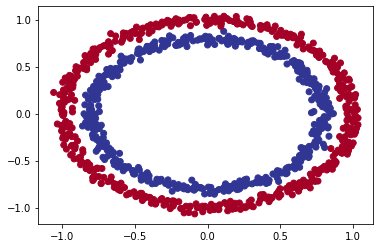

In [ ]:
plt.scatter(X[:,0], X[:,1], c = Y, cmap = plt.cm.RdYlBu)

313/313 [==============================] - 1s 3ms/step
doing binary


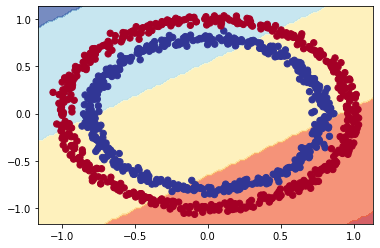

In [ ]:

# Check the decision boundary for our latest model
plot_decision_boundary(model=model_4,
                       X = X,
                       Y = Y)

In [ ]:

# Set random seed
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# 2. Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_5.fit(X, Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.3604 - accuracy: 0.4770
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3422 - accuracy: 0.4750
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3385 - accuracy: 0.4760
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3350 - accuracy: 0.4770
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3310 - accuracy: 0.4770
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3270 - accuracy: 0.4780
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3231 - accuracy: 0.4770
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3192 - accuracy: 0.4770
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3154 - accuracy: 0.4760
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3116 - accuracy: 0.4750
Epoch 11/

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, 4 neurons, ReLU activation
  tf.keras.layers.Dense(1) # ouput layer
])

# Compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

# Fit the model
history = model_6.fit(X, Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 1.0448 - accuracy: 0.4740
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8993 - accuracy: 0.4730
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8455 - accuracy: 0.4670
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8162 - accuracy: 0.4570
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7979 - accuracy: 0.4170
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7850 - accuracy: 0.3980
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7751 - accuracy: 0.3710
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7679 - accuracy: 0.3630
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7619 - accuracy: 0.3570
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7569 - accuracy: 0.3530
Epoch 11/

In [ ]:
# Evaluate the model
model_6.evaluate(X, Y)

32/32 [==============================] - 0s 2ms/step - loss: 0.5077 - accuracy: 0.7810


[0.5076517462730408, 0.781000018119812]

313/313 [==============================] - 0s 1ms/step
doing binary


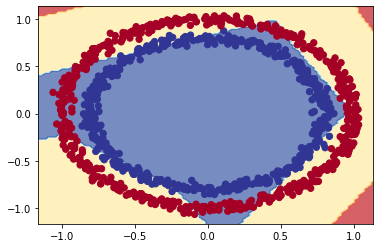

In [ ]:
# Check out the predictions using 2 hidden layers
plot_decision_boundary(model_6, X, Y)

Now having the last layer as Sigmoid

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history = model_7.fit(X, Y, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 0.6891 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6828 - accuracy: 0.5030
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.5300
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6774 - accuracy: 0.5290
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6758 - accuracy: 0.5230
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.5290
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6728 - accuracy: 0.5520
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6716 - accuracy: 0.5610
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6700 - accuracy: 0.5910
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6686 - accuracy: 0.5670
Epoch 11/

In [ ]:
model_7.evaluate(X, Y)

32/32 [==============================] - 0s 2ms/step - loss: 0.2501 - accuracy: 0.9820


[0.2500951588153839, 0.9819999933242798]

313/313 [==============================] - 0s 1ms/step
doing binary


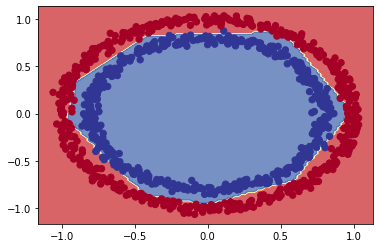

In [ ]:
plot_decision_boundary(model_7, X, Y)

Creating a dmmy tensor to visualize the activation function

In [ ]:
A = tf.constant(tf.range(-10, 10))
A = tf.cast(A, tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

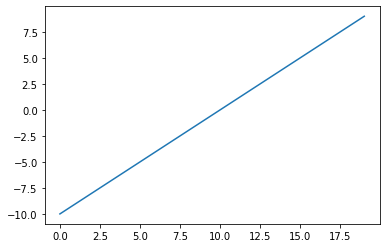

In [ ]:
plt.plot(A)

In [ ]:
# creating the sigmoid function
def sigmoid(x):
   return 1 /(1 + tf.exp(-x))

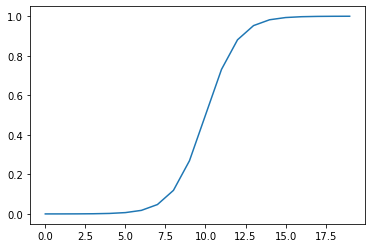

In [ ]:
plt.plot(sigmoid(A))

In [ ]:
def relu(x):
  return tf.maximum(0, x)

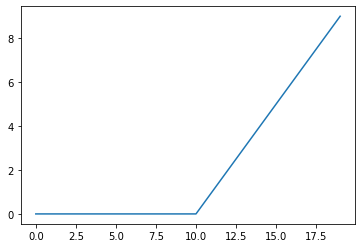

In [ ]:
plt.plot(relu(A))

# Improving our model more
further improving our model by using the dataset and dividing it in test and train

In [ ]:
# Importing sklearn library to split the dataset
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [ ]:
len(X_train), X_train.shape

(800, (800, 2))

In [ ]:
len(Y_train), Y_train.shape

(800, (800,))

In [ ]:
# creating the model

tf.random.set_seed(42)

# Create the model (same as model_7)
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"), # hidden layer 1, using "relu" for activation (same as tf.keras.activations.relu)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid") # output layer, using 'sigmoid' for the output
])

# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01), # increase learning rate from 0.001 to 0.01 for faster learning
                metrics=['accuracy'])

# Fit the model
history_1 = model_8.fit(X_train, Y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6905 - accuracy: 0.5300
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6833 - accuracy: 0.5362
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6789 - accuracy: 0.5763
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6743 - accuracy: 0.6137
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6678 - accuracy: 0.5537
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6577 - accuracy: 0.5900
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6473 - accuracy: 0.6075
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6385 - accuracy: 0.6300
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6308 - accuracy: 0.5962
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6182 - accuracy: 0.6525
Epoch 11/

In [ ]:
model_8.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (32, 4)                   12        
                                                                 
 dense_33 (Dense)            (32, 4)                   20        
                                                                 
 dense_34 (Dense)            (32, 1)                   5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_8.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0492 - accuracy: 0.9950


[0.04916701465845108, 0.9950000047683716]

313/313 [==============================] - 1s 1ms/step
doing binary
313/313 [==============================] - 0s 1ms/step
doing binary


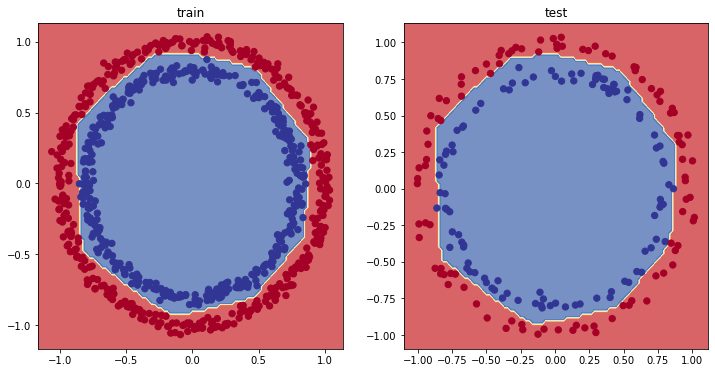

In [ ]:
# plot the decision boundaries for both the training data set and test dataset
plt.figure(figsize = (12, 6))
#With the subplot() function you can draw multiple plots in one figure:
'''https://www.w3schools.com/python/matplotlib_subplot.asp'''
plt.subplot(1, 2, 1) # plt.subplot(row, column, index)  refer the above link to understand rows and columns
'''we want the plot to have 1 row consisting of 2 column each containing images'''
plt.title("train")
plot_decision_boundary(model_8, X=X_train, Y = Y_train)
plt.subplot(1, 2, 2)
plt.title("test")
plot_decision_boundary(model_8, X = X_test, Y = Y_test)
plt.show();

## Plot the loss curves or the training curve

**The fit function of the model class retursn a HISTORY**

A History object. Its History.history attribute is a record of training loss values and metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

In [ ]:
# what does history.history shows
history_1.history

{'loss': [0.6905262470245361,
  0.6832877993583679,
  0.6789228916168213,
  0.6743153929710388,
  0.6678193807601929,
  0.6576569080352783,
  0.6472834944725037,
  0.6384973526000977,
  0.6308378577232361,
  0.6182153820991516,
  0.6011983156204224,
  0.5811086297035217,
  0.5717666149139404,
  0.5597338676452637,
  0.5411860942840576,
  0.5298781991004944,
  0.5172575116157532,
  0.5058207511901855,
  0.49284934997558594,
  0.4782079756259918,
  0.46308213472366333,
  0.4373793303966522,
  0.4184691905975342,
  0.40440452098846436,
  0.3865954279899597,
  0.36897677183151245,
  0.3548804223537445,
  0.348389208316803,
  0.3288116455078125,
  0.316389262676239,
  0.30233195424079895,
  0.29284489154815674,
  0.276762992143631,
  0.2627614438533783,
  0.2551364302635193,
  0.24208791553974152,
  0.23540332913398743,
  0.22249725461006165,
  0.2141437530517578,
  0.21214967966079712,
  0.19860215485095978,
  0.18959392607212067,
  0.18398407101631165,
  0.1747092455625534,
  0.1682545691

In [ ]:
# converting the history into a pandas dataframe
pd.DataFrame(history_1.history)

,loss,accuracy
0,0.690526,0.53000
1,0.683288,0.53625
2,0.678923,0.57625
3,0.674315,0.61375
4,0.667819,0.55375
...,...,...
95,0.030631,0.99750
96,0.028454,0.99750
97,0.027097,0.99750
98,0.029062,0.99625


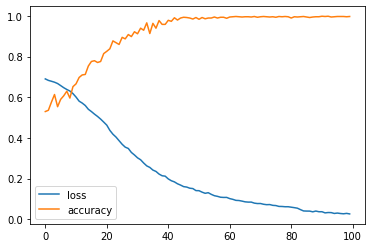

In [ ]:
pd.DataFrame(history_1.history).plot()

In [ ]:
''' we can see that the loss is going down and the accuracy is going up this is a sign that our code is doing well'''

' we can see that the loss is going down and the accuracy is going up this is a sign that our code is doing well'

# Finding the best learning rate

To fing the ideal learning rate (the learning rate where the loss decreases the most during the training) we're going to use the following steps:
* A learning rate **callback** (extra piece of functionality we can add to our model *while* its training)
* Another model
* A modified loss curves plot

In [ ]:
# set random seed
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 4, activation = 'relu'),
    tf.keras.layers.Dense(units = 4, activation = 'relu'),
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid')
])

#compiling the model
model_9.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# Create learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20))

#fitting the model
history_9 = model_9.fit(X_train, Y_train, epochs = 100, callbacks = [lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6907 - accuracy: 0.4975 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6905 - accuracy: 0.4950 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6903 - accuracy: 0.4988 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.5050 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6899 - accuracy: 0.5038 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.4963 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6894 - accuracy: 0.4988 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.5000 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

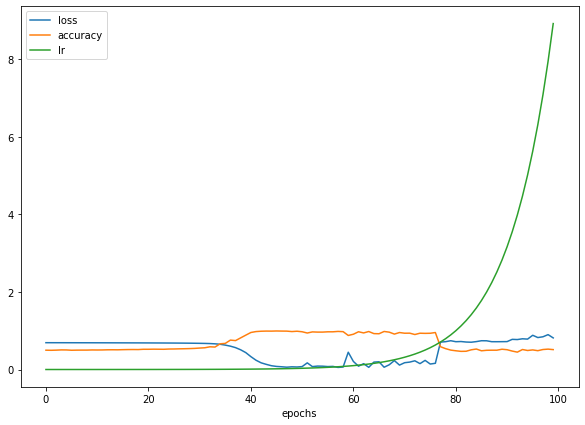

In [ ]:
pd.DataFrame(history_9.history).plot(figsize = (10, 7), xlabel = "epochs")

In [ ]:
# Now we want to plot for loss v/s learning rate
W = tf.range(100)
lrs = 1e-4 * (10 **( W / 20))  # we want the range 1 to 100 as we have 100 epochs gives
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

Text(0, 0.5, 'Loss')

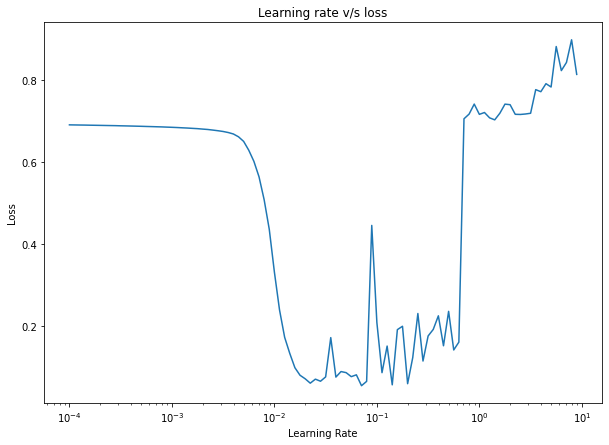

In [ ]:
# making the plot
plt.figure(figsize = (10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.title("Learning rate v/s loss")
plt.xlabel("Learning Rate")
plt.ylabel("Loss")

In [ ]:
# take a look at the graph and try to think where our learning rate would be (where the loss decreases the fastest)

To figure out the ideal value of the learning rate (at least the ideal value to *begin* training our model), the rule of thumb is to take the learning rate value where the loss is still decreasing but not quite flattened out (usually about 10x smaller than the bottom of the curve).

In this case, our ideal learning rate ends up between `0.01` ($10^{-2}$) and `0.02`.

![finding the ideal learning rate by plotting learning rate vs. loss](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-learning-rate-vs-loss.png)

*The ideal learning rate at the start of model training is somewhere just before the loss curve bottoms out (a value where the loss is still decreasing).*

In [ ]:
# Let's try using a higher *ideal* learning rate with the same model as before

# Set random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(lr=0.02),
                 metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history_10 = model_10.fit(X_train, Y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 4ms/step - loss: 0.6905 - accuracy: 0.5050
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.5050
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6866 - accuracy: 0.5100
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6857 - accuracy: 0.5125
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6841 - accuracy: 0.5163
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6831 - accuracy: 0.5150
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.5263
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6811 - accuracy: 0.5325
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6804 - accuracy: 0.5300
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.5312
Epoch 11/

In [ ]:
# Evaluate model 10 on the test dataset
model_10.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.2863 - accuracy: 0.9750


[0.28626400232315063, 0.9750000238418579]

In [ ]:
# Evaluate model 8 on the test dataset
model_8.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0492 - accuracy: 0.9950


[0.04916701465845108, 0.9950000047683716]

313/313 [==============================] - 1s 1ms/step
doing binary
313/313 [==============================] - 0s 1ms/step
doing binary


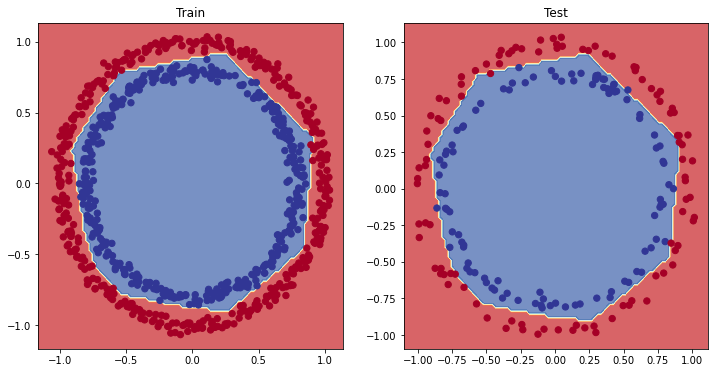

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_10, X=X_train, Y=Y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_10, X=X_test, Y=Y_test)
plt.show()

### More classification evaluation methods

Alongside the visualizations we've been making, there are a number of different evaluation metrics we can use to evaluate our classification models.

| **Metric name/Evaluation method** | **Defintion** | **Code** |
| --- | --- | --- |
| Accuracy | Out of 100 predictions, how many does your model get correct? E.g. 95% accuracy means it gets 95/100 predictions correct. | [`sklearn.metrics.accuracy_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) or [`tf.keras.metrics.Accuracy()`](tensorflow.org/api_docs/python/tf/keras/metrics/Accuracy) |
| Precision | Proportion of true positives over total number of samples. Higher precision leads to less false positives (model predicts 1 when it should've been 0). | [`sklearn.metrics.precision_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) or [`tf.keras.metrics.Precision()`](tensorflow.org/api_docs/python/tf/keras/metrics/Precision) |
| Recall | Proportion of true positives over total number of true positives and false negatives (model predicts 0 when it should've been 1). Higher recall leads to less false negatives. | [`sklearn.metrics.recall_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) or [`tf.keras.metrics.Recall()`](tensorflow.org/api_docs/python/tf/keras/metrics/Recall) |
| F1-score | Combines precision and recall into one metric. 1 is best, 0 is worst. | [`sklearn.metrics.f1_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) |
| [Confusion matrix](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)  | Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagnol line). | Custom function or [`sklearn.metrics.plot_confusion_matrix()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html) |
| Classification report | Collection of some of the main classification metrics such as precision, recall and f1-score. | [`sklearn.metrics.classification_report()`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) |

> 🔑 **Note:** Every classification problem will require different kinds of evaluation methods. But you should be familiar with at least the ones above.

Let's start with accuracy.

Because we passed `["accuracy"]` to the `metrics` parameter when we compiled our model, calling `evaluate()` on it will return the loss as well as accuracy.

In [ ]:
# Check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, Y_test)
print(f"The loss is : {loss}")
print(f"The accuracy is : {accuracy *100: .2f} %")  # .2f after the multiplicartion means we want the result to be rounded or approxmated upto 2 decimal places

7/7 [==============================] - 0s 3ms/step - loss: 0.2863 - accuracy: 0.9750
The loss is : 0.28626400232315063
The accuracy is :  97.50 %


In [ ]:
# Creating confusion metrics
from sklearn.metrics import confusion_matrix
y_pred = model_10.predict(X_test)
confusion_matrix(Y_test, y_pred)

7/7 [==============================] - 0s 3ms/step


ValueError: ignored

In [ ]:
# we get this erroe as the data are of different types

Y_test[:10] # the first 10 values

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0])

In [ ]:
y_pred[:10]

array([[0.8797781 ],
       [0.24267754],
       [0.85006875],
       [0.11591665],
       [0.6298346 ],
       [0.621268  ],
       [0.17701304],
       [0.17063706],
       [0.75569886],
       [0.22343771]], dtype=float32)

In [ ]:
# converting into binary formats
tf.round(y_pred)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [ ]:
# Creating confusion metrics
from sklearn.metrics import confusion_matrix
y_pred = model_10.predict(X_test)
confusion_matrix(Y_test, tf.round(y_pred))

7/7 [==============================] - 0s 4ms/step


array([[97,  3],
       [ 2, 98]])

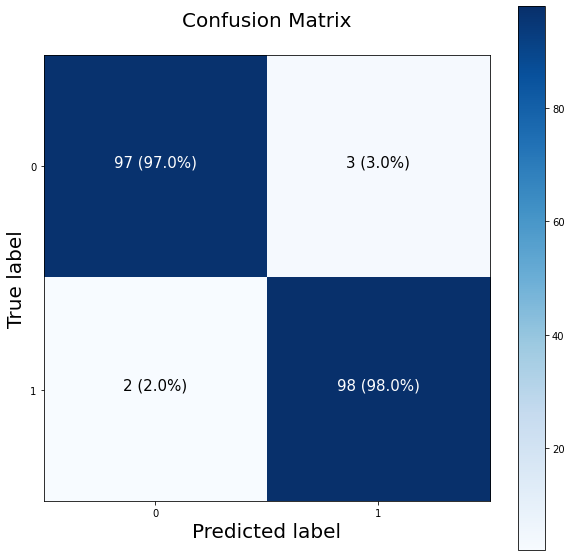

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(Y_test, tf.round(y_pred))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

Can directly use this code instead

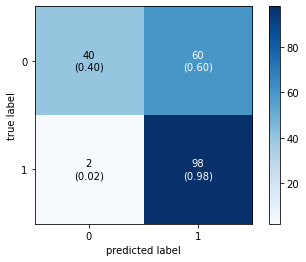

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np



binary = np.array([[40,  60],
       [ 2, 98]])

fig, ax = plot_confusion_matrix(conf_mat=binary,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()


# Multiclass classification

In [ ]:
# Working with a larger example (multiclass classification)

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# Reading through the documentation we know that the dataset is sorted in the train and test set

(train_data, train_label), (test_data, test_label) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_data[0].shape

(28, 28)

In [ ]:
train_data[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [ ]:
train_data.shape, train_label.shape, test_data.shape, test_label.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

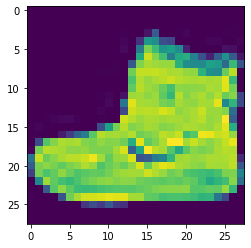

In [ ]:
plt.imshow(train_data[0])

In [ ]:
train_label[0]

9

In [ ]:
item_list = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
item_list

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

Text(0.5, 1.0, 'T-shirt/top')

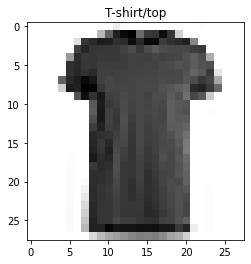

In [ ]:
index_of_choice = 17
plt.imshow(train_data[index_of_choice], cmap = plt.cm.binary)
plt.title(item_list[train_label[index_of_choice]])

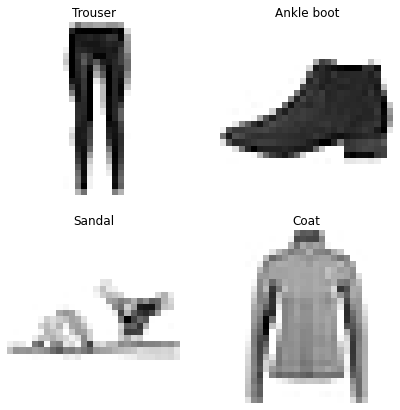

In [ ]:
# plotting multiple images
plt.figure(figsize = (7,7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))  # randomly choose a number from the range of train_data
  plt.imshow(train_data[rand_index], cmap= plt.cm.binary)
  plt.title(item_list[train_label[rand_index]])
  plt.axis(False) # the scale that comes it removes that the xa nd y axis

# Bulding a multiclass classification model

Alright, let's build a model to figure out the relationship between the pixel values and their labels.

Since this is a multiclass classification problem, we'll need to make a few changes to our architecture (inline with Table 1 above):

* The **input shape** will have to deal with 28x28 tensors (the height and width of our images).
  * We're actually going to squash the input into a tensor (vector) of shape `(784)`.
* The **output shape** will have to be 10 because we need our model to predict for 10 different classes.
  * We'll also change the `activation` parameter of our output layer to be [`"softmax"`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) instead of `'sigmoid'`. As we'll see the `"softmax"` activation function outputs a series of values between 0 & 1 (the same shape as **output shape**, which together add up to ~1. The index with the highest value is predicted by the model to be the most *likely* class.
* We'll need to change our loss function from a binary loss function to a multiclass loss function.
  * More specifically, since our labels are in integer form, we'll use [`tf.keras.losses.SparseCategoricalCrossentropy()`](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy), if our labels were one-hot encoded (e.g. they looked something like `[0, 0, 1, 0, 0...]`), we'd use [`tf.keras.losses.CategoricalCrossentropy()`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy).
* We'll also use the `validation_data` parameter when calling the `fit()` function. This will give us an idea of how the model performs on the test set during training.

You ready? Let's go.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_label,
                                epochs=10,
                                validation_data=(test_data, test_label)) # see how the model performs on the test set during training

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.0155 - accuracy: 0.1990 - val_loss: 1.7871 - val_accuracy: 0.2392
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7397 - accuracy: 0.2578 - val_loss: 1.6983 - val_accuracy: 0.2912
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6633 - accuracy: 0.2849 - val_loss: 1.6546 - val_accuracy: 0.3035
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6331 - accuracy: 0.2889 - val_loss: 1.6318 - val_accuracy: 0.2973
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5495 - accuracy: 0.3539 - val_loss: 1.4786 - val_accuracy: 0.3960
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.4723 - accuracy: 0.3824 - val_loss: 1.4385 - val_accuracy: 0.3996
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4018 - accuracy: 0.4105 - val_loss: 1.3854 - val_accuracy:

In [ ]:
# Check the shapes of our model
# Note: the "None" in (None, 784) is for batch_size, we'll cover this in a later module
model_11.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
''' Another method to code this without changing the loss function '''

' Another method to code this without changing the loss function '

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.CategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_12.fit(train_data,
                                tf.one_hot(train_label, depth = 10),
                                epochs=10,
                                validation_data = (test_data, tf.one_hot(test_label))) # see how the model performs on the test set during training

TypeError: ignored

## important things to keep in mind
* Neural network prefers the data in numerical form not string
* Make sure all the tensors are of right shape
* Scale features (normalize them) neural network prefers normalized or scaled data format
(they want the data to be in between 0 and 1)

In [ ]:
# check the max and min vale and see if its between 0 and 1
train_data.min(), train_data.max()

(0, 255)

In [ ]:
train_norm_data = train_data/255.0
test_norm_data = test_data/255.0

In [ ]:
train_norm_data.min(), train_norm_data.max()

(0.0, 1.0)

In [ ]:

tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model_13.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

norm_model_history = model_13.fit(train_norm_data,
             train_label,
             epochs = 10,
             validation_data = (test_norm_data, test_label))


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3969 - accuracy: 0.4139 - val_loss: 1.0543 - val_accuracy: 0.6128
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8765 - accuracy: 0.6865 - val_loss: 0.8067 - val_accuracy: 0.7063
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7495 - accuracy: 0.7201 - val_loss: 0.7565 - val_accuracy: 0.7153
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.7141 - accuracy: 0.7272 - val_loss: 0.7267 - val_accuracy: 0.7189
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6946 - accuracy: 0.7294 - val_loss: 0.7149 - val_accuracy: 0.7219
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6806 - accuracy: 0.7322 - val_loss: 0.7108 - val_accuracy: 0.7210
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6710 - accuracy: 0.7346 - val_loss: 0.6971 - val_accuracy:

In [ ]:
model_13.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 dense_39 (Dense)            (None, 4)                 3140      
                                                                 
 dense_40 (Dense)            (None, 4)                 20        
                                                                 
 dense_41 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [ ]:
''' We can see that just after normalizing our data we got a huge increase in our model performance on validation data '''

' We can see that just after normalizing our data we got a huge increase in our model performance on validation data '

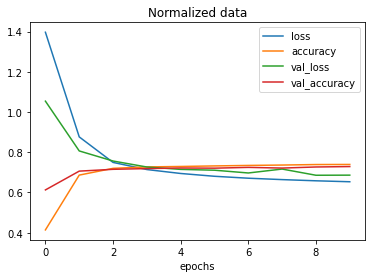

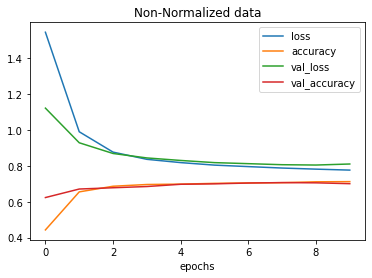

In [ ]:
pd.DataFrame(norm_model_history.history).plot(title = "Normalized data",xlabel = "epochs")
pd.DataFrame(non_norm_history.history).plot(title = "Non-Normalized data",xlabel = "epochs")


## Finding ideal learning rate

In [ ]:
# set random seed
tf.random.set_seed(42)

# Now building the model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# compiling model
model_14.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])

# Creting a learnng rate callback

lr_scheduler_1 = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-3 * 10 ** (epoch/20))

# fitting the model

find_lr_history = model_14.fit(train_norm_data,
             train_label,
             epochs = 40,
             validation_data = (test_norm_data, test_label),
             callbacks=[lr_scheduler_1])


Epoch 1/40
1875/1875 [==============================] - 65s 4ms/step - loss: 1.3779 - accuracy: 0.5088 - val_loss: 1.0338 - val_accuracy: 0.6225 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9240 - accuracy: 0.6701 - val_loss: 0.8336 - val_accuracy: 0.7066 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7133 - accuracy: 0.7431 - val_loss: 0.6862 - val_accuracy: 0.7587 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6049 - accuracy: 0.7907 - val_loss: 0.6181 - val_accuracy: 0.7895 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5738 - accuracy: 0.8021 - val_loss: 0.6262 - val_accuracy: 0.7865 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5569 - accuracy: 0.8077 - val_loss: 0.5968 - val_accuracy: 0.7994 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4

In [ ]:
# plot the learning rate

lrs_2 = 1e-3 *(10**(np.arange(40.0))/20)
lrs_2


array([5.e-05, 5.e-04, 5.e-03, 5.e-02, 5.e-01, 5.e+00, 5.e+01, 5.e+02,
       5.e+03, 5.e+04, 5.e+05, 5.e+06, 5.e+07, 5.e+08, 5.e+09, 5.e+10,
       5.e+11, 5.e+12, 5.e+13, 5.e+14, 5.e+15, 5.e+16, 5.e+17, 5.e+18,
       5.e+19, 5.e+20, 5.e+21, 5.e+22, 5.e+23, 5.e+24, 5.e+25, 5.e+26,
       5.e+27, 5.e+28, 5.e+29, 5.e+30, 5.e+31, 5.e+32, 5.e+33, 5.e+34])

Text(0.5, 1.0, 'finding ideal learning rate')

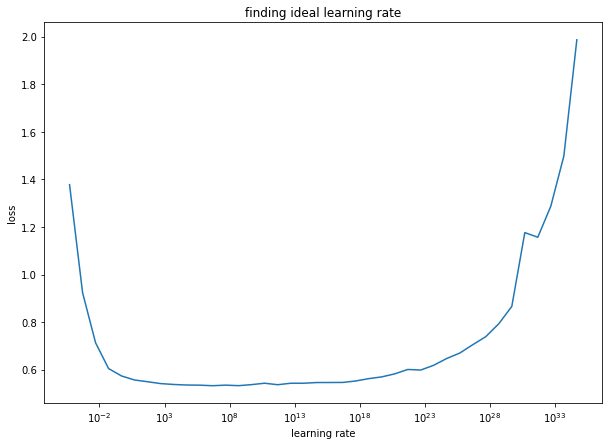

In [ ]:
plt.figure(figsize = (10, 7))
plt.semilogx(lrs_2, find_lr_history.history['loss'])
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.title('finding ideal learning rate')


In [ ]:
# so lets refit themodel with the ideal learning rate

# Set random seed
tf.random.set_seed(42)

# Create the model
model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_14.fit(train_norm_data,
                       train_label,
                       epochs=20,
                       validation_data=(test_norm_data, test_label))

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2334 - accuracy: 0.5742 - val_loss: 0.8975 - val_accuracy: 0.7121
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7870 - accuracy: 0.7521 - val_loss: 0.7546 - val_accuracy: 0.7553
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6831 - accuracy: 0.7824 - val_loss: 0.6843 - val_accuracy: 0.7786
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6417 - accuracy: 0.7905 - val_loss: 0.6621 - val_accuracy: 0.7816
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6196 - accuracy: 0.7931 - val_loss: 0.6461 - val_accuracy: 0.7831
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6066 - accuracy: 0.7966 - val_loss: 0.6423 - val_accuracy: 0.7860
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5976 - accuracy: 0.7988 - val_loss: 0.6779 - val_accuracy:

Now we've got a model trained with a close-to-ideal learning rate and performing pretty well, we've got a couple of options.

We could:
* Evaluate its performance using other classification metrics (such as a [confusion matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py) or [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)).
* Assess some of its predictions (through visualizations).
* Improve its accuracy (by training it for longer or changing the architecture).
* Save and export it for use in an application.

Let's go through the first two options.

First we'll create a classification matrix to visualize its predictions across the different classes.

In [ ]:
loss_1, accuracy_1 = model_14.evaluate(test_norm_data, test_label)
loss_1, accuracy_1

313/313 [==============================] - 1s 2ms/step - loss: 0.5936 - accuracy: 0.8032


(0.5936478972434998, 0.8032000064849854)

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model_14.predict(test_norm_data)
confusion_matrix(tf.one_hot(test_label), tf.round(y_pred))

313/313 [==============================] - 1s 2ms/step


TypeError: ignored

In [ ]:
y_probs = model_14.predict(test_norm_data)
y_probs[:2]

313/313 [==============================] - 1s 1ms/step


array([[6.0278481e-21, 5.2292480e-14, 6.9944770e-22, 2.0191328e-11,
        3.7071393e-13, 1.3990623e-01, 1.6819100e-16, 9.0544581e-02,
        1.6709670e-06, 7.6954746e-01],
       [1.4010191e-04, 3.8678161e-16, 6.5288484e-01, 1.1302643e-06,
        1.7043754e-01, 2.5133327e-17, 1.7651527e-01, 7.5774502e-21,
        2.1147789e-05, 1.8982523e-36]], dtype=float32)

* Remember that the prediction is made on the same kind of data on which the model is trained on

In [ ]:
y_probs[0], tf.argmax(y_probs[0]), item_list[tf.argmax(y_probs[0])]  # probability of what is there at 0th index
# tf.argmax --> this tells that whats the max value out of 10
# the graph has probabiity distribution of all probabilities


(array([6.0278481e-21, 5.2292480e-14, 6.9944770e-22, 2.0191328e-11,
        3.7071393e-13, 1.3990623e-01, 1.6819100e-16, 9.0544581e-02,
        1.6709670e-06, 7.6954746e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [ ]:
y_probs.shape

(10000, 10)

In [ ]:
y_preds = y_probs.argmax(axis = 1)

y_preds[:10], y_preds.shape

(array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7]), (10000,))

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_label, y_preds)

array([[793,  18,  13,  65,   3,   1,  97,   0,  10,   0],
       [ 13, 934,   0,  44,   1,   0,   7,   0,   1,   0],
       [ 53,   4, 553,  20, 174,   0, 191,   0,   5,   0],
       [ 43,  32,  13, 829,  35,   1,  42,   2,   3,   0],
       [  5,   0,  67,  50, 709,   0, 156,   0,  13,   0],
       [  0,   2,   0,   1,   0, 924,   0,  33,   4,  36],
       [189,   8,  70,  56, 127,   0, 526,   0,  24,   0],
       [  0,   0,   0,   0,   0,  37,   0, 924,   3,  36],
       [  2,   2,   1,   8,   8,   6,  42,   8, 923,   0],
       [  0,   0,   0,   0,   0,  32,   0,  50,   1, 917]])

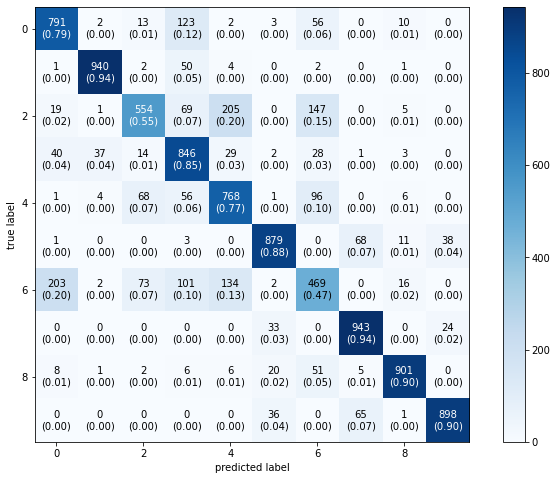

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np



binary = np.array([[791,   2,  13, 123,   2,   3,  56,   0,  10,   0],
       [  1, 940,   2,  50,   4,   0,   2,   0,   1,   0],
       [ 19,   1, 554,  69, 205,   0, 147,   0,   5,   0],
       [ 40,  37,  14, 846,  29,   2,  28,   1,   3,   0],
       [  1,   4,  68,  56, 768,   1,  96,   0,   6,   0],
       [  1,   0,   0,   3,   0, 879,   0,  68,  11,  38],
       [203,   2,  73, 101, 134,   2, 469,   0,  16,   0],
       [  0,   0,   0,   0,   0,  33,   0, 943,   0,  24],
       [  8,   1,   2,   6,   6,  20,  51,   5, 901,   0],
       [  0,   0,   0,   0,   0,  36,   0,  65,   1, 898]])



fig, ax = plot_confusion_matrix(conf_mat=binary,
                                figsize = (12,8),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True,
                                )
plt.show()


## Let's create a function to plot a random image along with its prediction.
🔑 **Note**: Often when working with images and other forms of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the outputs of your model.

* Plot a random image
* make predictions on the said images
* Label the plot with the truth label and predicted label

In [ ]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  # the reshape is that we are passing only ONE image of SIZE (28, 28)
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 [==============================] - 0s 128ms/step


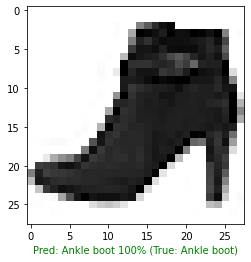

In [ ]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14,
                  images=test_data,
                  true_labels=test_label,
                  classes=item_list)

In other words, data and labels pass through a model (forward pass) and it attempts to learn the relationship between the data and labels.

And if this learned relationship isn't close to the actual relationship or it could be improved, the model does so by going back through itself (backward pass) and tweaking its weights matrices and bias values to better represent the data.

If all of this sounds confusing (and it's fine if it does, the above is a very succinct description), check out the resources in the extra-curriculum section for more.

## Checking the patterns

In [ ]:
weights, biases = model_14.layers[1].get_weights()

In [ ]:
weights, weights.shape

(array([[ 0.4910056 , -0.40669355, -0.10436577,  0.03213136],
        [-0.37510255, -0.40546197,  0.27512002,  0.0373665 ],
        [-0.7838292 , -0.07618886,  0.9510644 , -0.22249699],
        ...,
        [-0.332562  ,  0.09309909,  0.48450547,  0.7173793 ],
        [ 0.11146048,  0.11301654, -0.3584719 ,  0.7691538 ],
        [-0.26223934,  0.32233357, -0.23096244,  0.45986015]],
       dtype=float32), (784, 4))

The weights matrix is the same shape as the input data, which in our case is 784 (28x28 pixels). And there's a copy of the weights matrix for each neuron the in the selected layer (our selected layer has 4 neurons).

Each value in the weights matrix corresponds to how a particular value in the input data influences the network's decisions.

These values start out as random numbers (they're set by the kernel_initializer parameter when creating a layer, the default is "glorot_uniform") and are then updated to better representative values of the data (non-random) by the neural network during training.

In [ ]:
# as the input shape of each node is (28,28) and we have 4 nodes in layer 1 thats why we got (784, 4) shape
28 * 28

784

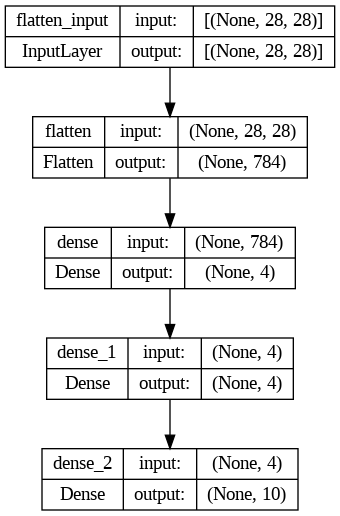

In [ ]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)